In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [11]:
# Load the cleaned data
X_train = pd.read_csv("X_train_clean.csv")
X_test = pd.read_csv("X_test_clean.csv")
y_train = pd.read_csv("y_train_clean.csv")
y_test = pd.read_csv("y_test_clean.csv")

print("✅ Data loaded successfully!")


✅ Data loaded successfully!


In [20]:
X_train.drop(columns=['Loan_ID'], inplace=True)
X_test.drop(columns=['Loan_ID'], inplace=True)

In [21]:
X_train.shape

(491, 14)

In [22]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

d:\Personal Projects\Data\loan_default_prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7357 - loss: 0.6571 - val_accuracy: 0.7172 - val_loss: 0.6369
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7542 - loss: 0.6131 - val_accuracy: 0.7273 - val_loss: 0.5990
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7734 - loss: 0.5825 - val_accuracy: 0.7576 - val_loss: 0.5668
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7926 - loss: 0.5418 - val_accuracy: 0.7980 - val_loss: 0.5351
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8014 - loss: 0.5171 - val_accuracy: 0.7879 - val_loss: 0.5174
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7862 - loss: 0.5217 - val_accuracy: 0.7879 - val_loss: 0.5069
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8226 - loss: 0.4569 - val_accuracy: 0.7879 - val_loss: 0.5042
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8428 - loss: 0.3959 - val_accuracy: 0.7879 - val_loss

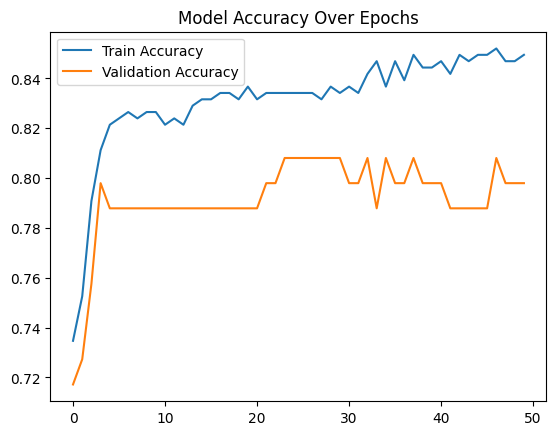

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

In [29]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 


In [30]:
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

✅ Test Accuracy: 0.7398373983739838
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



In [31]:
model.save('loan_default_model.h5')
print("✅ Model saved as loan_default_model.h5")

✅ Model saved as loan_default_model.h5


## Testing model with sample data

In [32]:
sample = X_test.iloc[0]
sample_array = np.array(sample).reshape(1,-1)
prediction = model.predict(sample_array)

print("Predicted probability:", prediction)
print("Predicted class:", (prediction > 0.5).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted probability: [[0.92449856]]
Predicted class: [[1]]


In [34]:
sample_array

array([[ 0.60280171, -0.55448733,  0.97868652,  0.2732313 ,  0.41173269,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ]])

In [35]:
sample

ApplicantIncome            0.602802
CoapplicantIncome         -0.554487
LoanAmount                 0.978687
Loan_Amount_Term           0.273231
Credit_History             0.411733
Gender_Male                1.000000
Married_Yes                1.000000
Dependents_1               0.000000
Dependents_2               0.000000
Dependents_3+              0.000000
Education_Not Graduate     0.000000
Self_Employed_Yes          0.000000
Property_Area_Semiurban    1.000000
Property_Area_Urban        0.000000
Name: 0, dtype: float64